## NLP - EXP - 4

Atharva Prashant Pawar (9427) - [ Batch - D ]

Test2 : Implement N-gram model for sentiment analysis and analyze the effect of different value of N on the model. prediction

In [1]:
!pip install nltk

In [8]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# movie reviews dataset
nltk.download('movie_reviews')
positive_reviews = [(list(movie_reviews.words(fileid)), 'positive') for fileid in movie_reviews.fileids('pos')]
negative_reviews = [(list(movie_reviews.words(fileid)), 'negative') for fileid in movie_reviews.fileids('neg')]
all_reviews = positive_reviews + negative_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [4]:
# Define the N for N-grams
# N = 2

In [10]:
def preproccess(N):
  all_ngrams = [ngrams(review, N) for review, _ in all_reviews]  # Createing N-grams for all reviews

  flat_ngrams = [ng for ngram_list in all_ngrams for ng in ngram_list] # Flatten N-grams

  ngram_freq_dist = FreqDist(flat_ngrams)  # Frequency distribution of N-grams

  # Conditional frequency distribution of N-grams based on sentiment
  cfd = ConditionalFreqDist([(ng, sentiment) for ng, sentiment in zip(flat_ngrams, [sent for _, sent in all_reviews])])

  # function to extract features from a review
  def extract_features(review):
      features = {}
      for ng in ngrams(review, N):
          features[' '.join(ng)] = True
      return features

  featuresets = [(extract_features(review), sentiment) for review, sentiment in all_reviews] # Createing feature sets

  train_set, test_set = featuresets[:1600], featuresets[1600:] # Split train and test sets

  classifier = NaiveBayesClassifier.train(train_set) # Train Naive Bayes classifier

  # Test the classifier
  accuracy_score = accuracy(classifier, test_set)
  print("Accuracy:", accuracy_score)
  return { "N" : N, "Accuracy" : accuracy_score}

In [22]:
Nval = 5
result = []
for nItem in range(Nval):
  outResult = preproccess(nItem)
  result.append(outResult)

Accuracy: 0.0
Accuracy: 0.4525
Accuracy: 0.73
Accuracy: 0.89
Accuracy: 0.915


In [23]:
print(result)

[{'N': 0, 'Accuracy': 0.0}, {'N': 1, 'Accuracy': 0.4525}, {'N': 2, 'Accuracy': 0.73}, {'N': 3, 'Accuracy': 0.89}, {'N': 4, 'Accuracy': 0.915}]


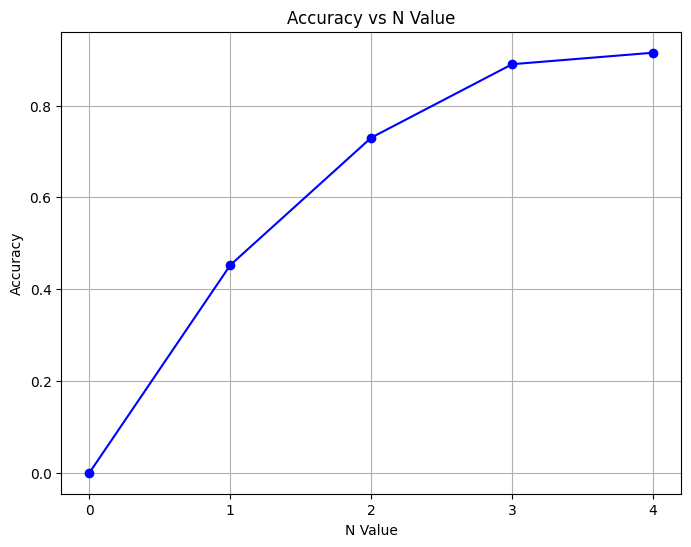

In [26]:
import matplotlib.pyplot as plt

# [{'N': 0, 'Accuracy': 0.0}, {'N': 1, 'Accuracy': 0.4525}, {'N': 2, 'Accuracy': 0.73}, {'N': 3, 'Accuracy': 0.89}, {'N': 4, 'Accuracy': 0.915}]

# Extract N values and Accuracy values from the result list
n_values = [item['N'] for item in result]
accuracy_values = [item['Accuracy'] for item in result]

plt.figure(figsize=(8, 6))
plt.plot(n_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs N Value')
plt.xlabel('N Value')
plt.ylabel('Accuracy')
plt.xticks(n_values)  # Set x-axis ticks to match N values
plt.grid(True)
plt.show()
